In [1]:
import numpy as np
import matplotlib.pyplot as plt
import igraph as ig
from utils import *

In [2]:
import igraph as ig

g = erdos()
info(g)

Is Directed:              False
Average Degree:           59.93333333333333
Max Degree:               79
Clustering Coefficient:   0.20196545227822965
Number of Vertices:       300
Number of Edges:          8990
Gamma:                    1.3873722004014302
Number of Components:     1
LCC:                      1.0
Avg. Path Length:         1.7995540691192866


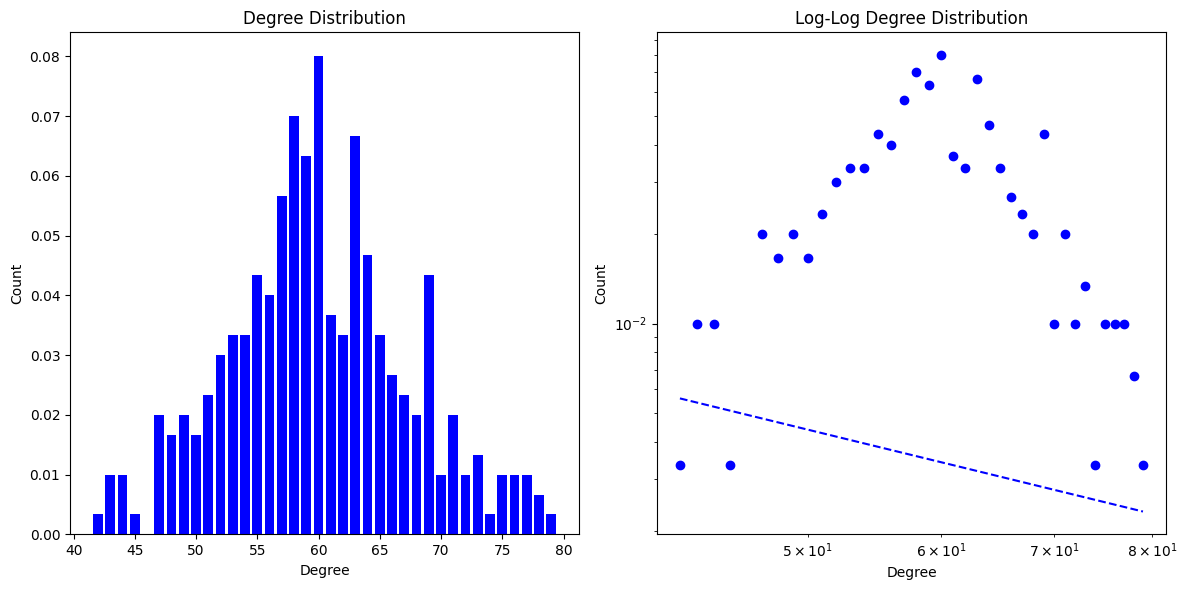

In [3]:
plot_deg(g)

In [4]:
dg = read_pajek("example-graphs/dolphins.net")
list([v['name'] for v in dg.vs])[:10]

['Beak',
 'Beescratch',
 'Bumper',
 'CCL',
 'Cross',
 'DN16',
 'DN21',
 'DN63',
 'Double',
 'Feather']

In [5]:
dg.vs.find('DN16')

igraph.Vertex(<igraph.Graph object at 0x000001FF671E5550>, 5, {'name': 'DN16'})

In [6]:
df = dg.get_edge_dataframe()
df = df[df['source'] == 0]
df

,source,target
edge ID,,
0,0,10
1,0,14
2,0,15
3,0,40
4,0,42
5,0,47


In [7]:
dg.get_edgelist()[:10]

[(0, 10),
 (0, 14),
 (0, 15),
 (0, 40),
 (0, 42),
 (0, 47),
 (1, 17),
 (1, 19),
 (1, 26),
 (1, 27)]

In [8]:
np.max(dg.degree())

12

In [9]:
list(components(dg))

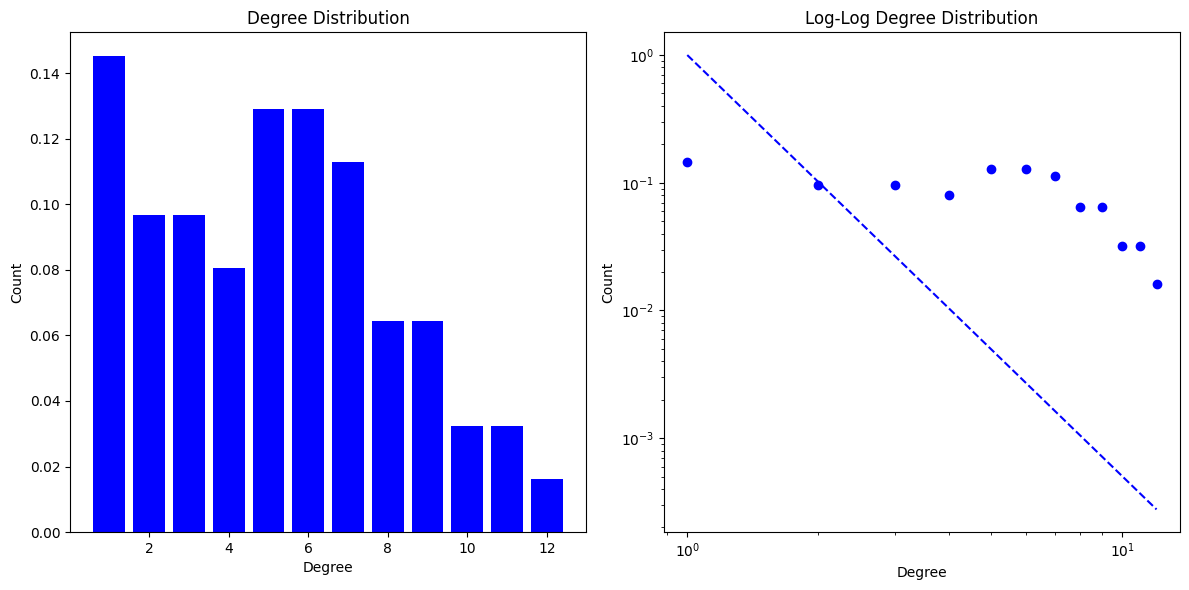

In [10]:
plot_deg(dg)

In [11]:
gi = read_pajek("example-graphs/imdb.net")
info(gi, approx_len=True)

Is Directed:              False
Average Degree:           32.6647323206463
Max Degree:               784
Clustering Coefficient:   0.3390564076688012
Number of Vertices:       17577
Number of Edges:          287074
Gamma:                    1.621899020690801
Number of Components:     19
LCC:                      0.9930591113386812
Approx. Avg. Path Length: 4.869565217391305


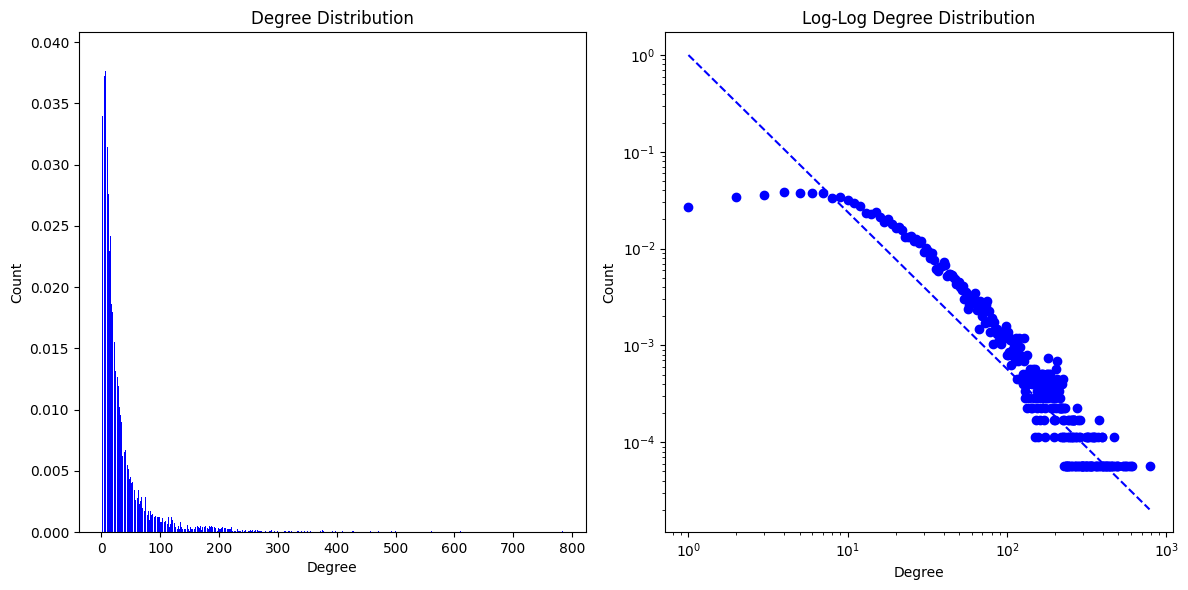

In [12]:
plot_deg(gi)